# Empresa de venta de productos alimenticios

En esta investigación se realizarán análisis a un datset de una empresa emergente que vende productos alimenticios, para estudiar el embudo de ventas, y cómo llegan a la etapa de compra, luego se realizará un test A/A/B, y analizar los resultados.


Por este motivo, se buscará lo siguiente:


1. Abrir el archivo de datos y analizar la información general.
2. Preprocesar los datos.
3. Estudiar y comprobar los datos.
4. Estudiar el embudo de eventos.
5. Estudiar los resultados del experimento.
6. Escribir una conclusión general.

## Inicialización

In [1]:
#Cargar las librerías
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
from scipy.stats import ttest_ind
import scipy.stats as stats
import numpy as np
import pandas as pd

### Cargar los datos


In [2]:
exp_data = pd.read_csv('/datasets/logs_exp_us.csv', sep = "\t")
exp_data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


### Preparar los datos

In [3]:
exp_data.columns = ['event_name', 'device_id', 'timestamp', 'exp_id']
exp_data.head()

,event_name,device_id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   device_id   244126 non-null  int64 
 2   timestamp   244126 non-null  int64 
 3   exp_id      244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
exp_data['timestamp'] = pd.to_datetime(exp_data['timestamp'], unit='s')
exp_data['event_name'] = exp_data['event_name'].astype('category')
exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  category      
 1   device_id   244126 non-null  int64         
 2   timestamp   244126 non-null  datetime64[ns]
 3   exp_id      244126 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 5.8 MB


In [6]:
exp_data.head()

,event_name,device_id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [7]:
exp_data['datetime'] = pd.to_datetime(exp_data['timestamp'], format='%Y-%m-%dZ%H:%M:%S')
exp_data.head()

,event_name,device_id,timestamp,exp_id,datetime
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25 11:48:42


In [8]:
exp_data['date'] = exp_data['datetime'].dt.date
exp_data.head()

,event_name,device_id,timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25 11:48:42,2019-07-25


Se analizó el dataset, se pudo observar que habían columnas con el tipo incorrecto, por este motivo, se cambiaron al tipo correcto; además se añadieron nuevas columnas de fecha y hora, y de fecha en el dataframe: Por último, no se encontraron valores ausentes.

In [9]:
exp_data.duplicated().sum()

413

In [10]:
exp_data = exp_data.drop_duplicates()
exp_data.duplicated().sum()

0

In [11]:
exp_data['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

In [12]:
exp_data['exp_id'].value_counts()

248    85582
246    80181
247    77950
Name: exp_id, dtype: int64

In [13]:
exp_data['device_id'].value_counts()

6304868067479728361    2307
197027893265565660     1998
4623191541214045580    1768
6932517045703054087    1439
1754140665440434215    1221
                       ... 
395376432319166724        1
404128138074395619        1
6936517579657223951       1
5138854326043201424       1
3954096321632083010       1
Name: device_id, Length: 7551, dtype: int64

In [14]:
unique_246_user = exp_data.query('exp_id == "246"')['device_id'].unique()
unique_247_user = exp_data.query('exp_id == "247"')['device_id'].unique()
unique_248_user = exp_data.query('exp_id == "248"')['device_id'].unique()
print(set(unique_247_user).issubset(set(unique_246_user)))
print(set(unique_248_user).issubset(set(unique_247_user)))
print(set(unique_248_user).issubset(set(unique_246_user)))

True
True
True


Esto indica que los grupos de control se dividieron correctamente y que los usuarios son independientes en cada grupo.

## Estudiar y comprobar los datos

### ¿Cuántos eventos hay en los registros?

In [15]:
num_events = len(exp_data['event_name'].unique())

print(f'Hay {num_events} eventos en los registros.')

Hay 5 eventos en los registros.


In [16]:
exp_data.shape[0]

243713

Hay 5 categorías de eventos, y más de 243 000 eventos registrados.

### ¿Cuántos usuarios y usuarias hay en los registros?

In [17]:
exp_data['device_id'].value_counts()

6304868067479728361    2307
197027893265565660     1998
4623191541214045580    1768
6932517045703054087    1439
1754140665440434215    1221
                       ... 
395376432319166724        1
404128138074395619        1
6936517579657223951       1
5138854326043201424       1
3954096321632083010       1
Name: device_id, Length: 7551, dtype: int64

En los registros hay alrededor de 7551 usuarios y usuarias únicos

### ¿Cuál es el promedio de eventos por usuario?

In [18]:
number_of_events_per_user = exp_data.groupby('device_id')['event_name'].count().sort_values(ascending=False).reset_index()
number_of_events_per_user

,device_id,event_name
0,6304868067479728361,2307
1,197027893265565660,1998
2,4623191541214045580,1768
3,6932517045703054087,1439
4,1754140665440434215,1221
...,...,...
7546,7399061063341528729,1
7547,2968164493349205501,1
7548,8071397669512236988,1
7549,425817683219936619,1


In [19]:
number_of_events_per_user['event_name'].mean()

32.27559263673685

El promedio de eventos por usuario es alrededor de 33 eventos.

### ¿Qué periodo de tiempo cubren los datos? 

In [20]:
min_date = exp_data["timestamp"].min()
min_date

Timestamp('2019-07-25 04:43:36')

In [21]:
max_date = exp_data["timestamp"].max()
max_date

Timestamp('2019-08-07 21:15:17')

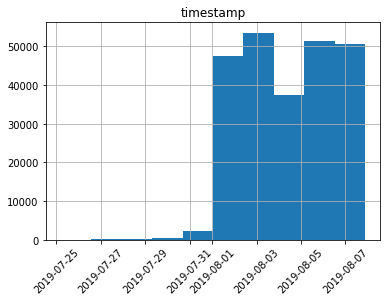

In [22]:
exp_data.hist(column="timestamp", bins=10)
plt.xticks(rotation=45)
plt.show()

se puede observar que en el periodo de tiempo del 25 de julio del 2019 hasta el 31 de julio del 2019, la cantidad de datos es significativamente menor, lo que quiere decir que estos eventos antiguos pueden estar sesgados. Por este motivo, se deberían tomar en cuenta más actuales desde el 1 de agosto del 2019, ya que en este periodo estan más completos los datos.

### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [23]:
new_exp_data = exp_data.query('timestamp >= "2019-08-01"')
new_exp_data

,event_name,device_id,timestamp,exp_id,datetime,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07 21:14:58,2019-08-07


No se perdieron muchos eventos al excluir los eventos de las fechas más antiguas.

### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales

In [24]:
users_exp_group = new_exp_data.groupby('exp_id').agg({'device_id': 'nunique'})
users_exp_group

,device_id
exp_id,
246,2484
247,2513
248,2537


Sí hay usuarios de los tres grupos experimentales.

## Estudiar el embudo de eventos

### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [25]:
new_exp_data.groupby('event_name')['event_name'].count().sort_values(ascending=False)

event_name
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

El evento main screen appear es que más frecuencia posee

### Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias.

In [26]:
events_count = new_exp_data.groupby('event_name').agg({'device_id': 'nunique'}).sort_values(by=('device_id'), ascending=False).reset_index()
events_count

,event_name,device_id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


### Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez

In [27]:
total_unique_users = events_count['device_id'].sum()
total_unique_users

20125

In [28]:
print((7419 / total_unique_users).round(2))
print((4593 / total_unique_users).round(2))
print((3734 / total_unique_users).round(2))
print((3539 / total_unique_users).round(2))
print((840 / total_unique_users).round(2))

0.37
0.23
0.19
0.18
0.04


MainScreenAppeares el evento con mayor proporción en los usuarios únicos

### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia?

el orden en que ocurrieron los eventos fueron de la siguiente manera: 

- evento 1: tutorial
- evento 2: MainScreenAppear
- evento 3: OffersScreenAppear
- evento 4: CartScreenAppear
- evento 5: PaymentScreenSuccessful

Me parece que el tutorial fue el primer evento, ya que pudo ser lo primero que se encuentran los usuarios, y la mayoría de estos optan por saltear esta parte y seguiar al otro evento, el cual es la presencia de la pantalla principal. Además, todas son parte de una sola secuencia.

### Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente.

In [29]:
users = new_exp_data.pivot_table(index='device_id', columns='event_name', values='timestamp', aggfunc='min')
users.head()

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT


In [30]:
n_mainscreenappear = users[~users['MainScreenAppear'].isna()].shape[0]
print('Visitantes:', n_mainscreenappear)

Visitantes: 7419


In [31]:
step_1 = ~users['Tutorial'].isna()
step_2 = step_1 & (users['MainScreenAppear'] > users['Tutorial'])
step_3 = step_2 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_4 = step_3 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_5 = step_4 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

n_tutorial = users[step_1].shape[0]
n_mainscreenappear = users[step_2].shape[0]
n_offerscreenappear = users[step_3].shape[0]
n_cartscreenappear = users[step_4].shape[0]
n_paymentscreen = users[step_5].shape[0]

print('Visitantes:', n_tutorial)
print('Aparición de la pantalla principal:', n_mainscreenappear)
print('Aparición de pantalla de ofertas:', n_offerscreenappear)
print('Aparicion de la pantalla del carrito de compras:', n_cartscreenappear)
print('Aparicion de la pantalla del carrito de pago exitoso:', n_paymentscreen)

Visitantes: 840
Aparición de la pantalla principal: 787
Aparición de pantalla de ofertas: 622
Aparicion de la pantalla del carrito de compras: 349
Aparicion de la pantalla del carrito de pago exitoso: 215


In [32]:
215 / 840

0.25595238095238093

Se puede observar que de los 840 usuarios que empezaron el recorrido desde el primer evento, solo 215 terminaron el pedido, lo cual equivale al 26% de usuarios. Sin embargo, hay otros usuarios que terminaron el pedido por diferentes vias 

In [33]:
step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

n_mainscreenappear = users[step_1].shape[0]
n_offerscreenappear = users[step_2].shape[0]
n_cartscreenappear = users[step_3].shape[0]
n_paymentscreen = users[step_4].shape[0]

print('Aparición de la pantalla principal:', n_mainscreenappear)
print('Aparición de pantalla de ofertas:', n_offerscreenappear)
print('Aparicion de la pantalla del carrito de compras:', n_cartscreenappear)
print('Aparicion de la pantalla del carrito de pago exitoso:', n_paymentscreen)

Aparición de la pantalla principal: 7419
Aparición de pantalla de ofertas: 4201
Aparicion de la pantalla del carrito de compras: 1767
Aparicion de la pantalla del carrito de pago exitoso: 454


In [34]:
454 / 7419

0.06119423102844049

Se puede observar que de los 7419 usuarios que empezaron el recorrido desde otro evento, solo 454 terminaron el pedido, lo cual equivale al 6% de usuarios. No muchos completaron el recorrido

In [35]:
 new_exp_data.groupby('event_name')['device_id'].nunique().sort_values(ascending=False)

event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: device_id, dtype: int64

## Estudiar los resultados del experimento

### ¿Cuántos usuarios y usuarias hay en cada grupo?

In [36]:
control_group_1 = exp_data[exp_data['exp_id'] == 246]
control_group_2 = exp_data[exp_data['exp_id'] == 247]
test_group = exp_data[exp_data['exp_id'] == 248]

users_control_group_1 = len(control_group_1['device_id'].unique())
users_control_group_2 = len(control_group_2['device_id'].unique())
users_test_group = len(test_group['device_id'].unique())

print("Usuarios en control_group_1:", users_control_group_1)
print("Usuarios en control_group_2:", users_control_group_2)
print("Usuarios en test_group:", users_test_group)

Usuarios en control_group_1: 2489
Usuarios en control_group_2: 2520
Usuarios en test_group: 2542


### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [37]:
conversions = new_exp_data[['device_id', 'exp_id']].drop_duplicates()
converted = pd.DataFrame(data={
    "device_id": new_exp_data[new_exp_data["event_name"] == "PaymentScreenSuccessful"]["device_id"].unique(),
    "converted": 1
})
conversions = conversions.merge(converted, on="device_id", how="left")
conversions["converted"] = conversions["converted"].fillna(0)
conversions.head()

,device_id,exp_id,converted
0,3737462046622621720,246,1.0
1,1433840883824088890,247,0.0
2,4899590676214355127,247,1.0
3,1182179323890311443,246,0.0
4,4613461174774205834,248,1.0


In [38]:
purchases = np.array([(conversions.query('exp_id == 246 and converted == 1')['converted'].count()), 
                      conversions.query('exp_id == 247 and converted == 1')['converted'].count()])
leads = np.array([(conversions.query('exp_id == 246')['exp_id'].count()), 
                  (conversions.query('exp_id == 247')['exp_id'].count())])

significance = 0.05
p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]
p_combined = ((purchases[0]+purchases[1])/(leads[0]+leads[1]))
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0]+1/leads[1]))

distr = st.norm(0,1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value:', p_value)

if (p_value < significance):
    print('Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones.')
else:
    print('No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes.')

p-value: 0.11456679313141849
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes.


### Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [39]:
# Seleccionar el evento más popular
most_common_event = exp_data['event_name'].value_counts().index[0]
most_common_event

'MainScreenAppear'

In [40]:
# Contar la cantidad de usuarios y usuarias en cada grupo de control que realizaron el evento más popular
event_control_group_1 = control_group_1[control_group_1['event_name'] == most_common_event]
event_control_group_2 = control_group_2[control_group_2['event_name'] == most_common_event]
count_event_control_group_1 = len(event_control_group_1['device_id'].unique())
count_event_control_group_2 = len(event_control_group_2['device_id'].unique())
print(count_event_control_group_1)
print(count_event_control_group_2)

2456
2482


El evento más popular en cada uno de los eventos de control es el 'MainScreenAppear'

In [43]:

def z_test(df, group_1, group_2, event, group_col="exp_id", conv_col="converted"):


    conversions = df[["device_id", group_col]].drop_duplicates()

    converted = pd.DataFrame(data={
      "device_id": df[df["event_name"] == event]["device_id"].unique(),
      "converted": 1
    })

    conversions = conversions.merge(converted, on="device_id", how="left")
    conversions["converted"] = conversions["converted"].fillna(0)
    print(conversions.head())


    purchases = np.array([(conversions.query(f'{group_col} == {group_1} and converted == 1')[conv_col].count()), 
                          conversions.query(f'{group_col} == {group_2} and converted == 1')[conv_col].count()])
    leads = np.array([(conversions.query(f'{group_col} == {group_1}')[group_col].count()), 
                      (conversions.query(f'{group_col} == {group_2}')[group_col].count())])



    print(purchases)    
    print(leads)  

    p1 = purchases[0]/leads[0]
    p2 = purchases[1]/leads[1]
    p_combined = ((purchases[0]+purchases[1])/(leads[0]+leads[1]))
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0]+1/leads[1]))

    distr = st.norm(0,1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return(p_value)

z_test(new_exp_data, '246', '247', 'PaymentScreenSuccessful')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1200 1158]
[2484 2513]


0.11456679313141849

In [44]:
z_test(new_exp_data, '246', '247', 'CartScreenAppear')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1266 1238]
[2484 2513]


0.22883372237997213

In [45]:
z_test(new_exp_data, '246', '247', 'OffersScreenAppear') 

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1542 1520]
[2484 2513]


0.2480954578522181

In [46]:
z_test(new_exp_data, '246', '247', 'MainScreenAppear') 

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        1.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        1.0
4  4613461174774205834     248        1.0
[2450 2476]
[2484 2513]


0.7570597232046099

In [47]:
z_test(new_exp_data, '246', '247', 'Tutorial') 

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        0.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        0.0
[278 283]
[2484 2513]


0.9376996189257114

Se dividieron correctamente, ya que las proporciones van de acuerdo al orden en que se ejecutan estos eventos según la cantidad de usuarios.

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [55]:
def z_test(df, group_1, group_2, event, group_col="exp_id", conv_col="converted"):


    conversions = df[["device_id", group_col]].drop_duplicates()

    converted = pd.DataFrame(data={
      "device_id": df[df["event_name"] == event]["device_id"].unique(),
      "converted": 1
    })

    conversions = conversions.merge(converted, on="device_id", how="left")
    conversions["converted"] = conversions["converted"].fillna(0)
    print(conversions.head())


    purchases = np.array([(conversions.query(f'{group_col} == {group_1} and converted == 1')[conv_col].count()), 
                          conversions.query(f'{group_col} == {group_2} and converted == 1')[conv_col].count()])
    leads = np.array([(conversions.query(f'{group_col} == {group_1}')[group_col].count()), 
                      (conversions.query(f'{group_col} == {group_2}')[group_col].count())])



    print(purchases)    
    print(leads)  

    p1 = purchases[0]/leads[0]
    p2 = purchases[1]/leads[1]
    p_combined = ((purchases[0]+purchases[1])/(leads[0]+leads[1]))
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0]+1/leads[1]))

    distr = st.norm(0,1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return(p_value)

z_test(new_exp_data, '246', '248', 'PaymentScreenSuccessful')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1200 1181]
[2484 2537]


0.2122553275697796

In [56]:
z_test(new_exp_data, '246', '248', 'CartScreenAppear')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1266 1230]
[2484 2537]


0.07842923237520116

In [57]:
z_test(new_exp_data, '246', '248', 'OffersScreenAppear')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1542 1531]
[2484 2537]


0.20836205402738917

In [58]:
z_test(new_exp_data, '246', '248', 'MainScreenAppear') 

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        1.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        1.0
4  4613461174774205834     248        1.0
[2450 2493]
[2484 2537]


0.2949721933554552

In [59]:
z_test(new_exp_data, '246', '248', 'Tutorial') 

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        0.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        0.0
[278 279]
[2484 2537]


0.8264294010087645

In [60]:
z_test(new_exp_data, '247', '248', 'PaymentScreenSuccessful')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1158 1181]
[2513 2537]


0.7373415053803964

In [62]:
z_test(new_exp_data, '247', '248', 'CartScreenAppear')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1238 1230]
[2513 2537]


0.5786197879539783

In [63]:
z_test(new_exp_data, '247', '248', 'OffersScreenAppear')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[1520 1531]
[2513 2537]


0.9197817830592261

In [64]:
z_test(new_exp_data, '247', '248', 'MainScreenAppear') 

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        1.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        1.0
4  4613461174774205834     248        1.0
[2476 2493]
[2513 2537]


0.4587053616621515

In [65]:
z_test(new_exp_data, '247', '248', 'Tutorial') 

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        0.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        0.0
[283 279]
[2513 2537]


0.765323922474501

In [67]:
def z_test(df, group_1, group_2, group_3, event, group_col="exp_id", conv_col="converted"):


    conversions = df[["device_id", group_col]].drop_duplicates()

    converted = pd.DataFrame(data={
      "device_id": df[df["event_name"] == event]["device_id"].unique(),
      "converted": 1
    })

    conversions = conversions.merge(converted, on="device_id", how="left")
    conversions["converted"] = conversions["converted"].fillna(0)
    print(conversions.head())


    purchases = np.array(([(conversions.query(f'{group_col} == {group_1} and converted == 1')[conv_col].count()) + 
                          (conversions.query(f'{group_col} == {group_2} and converted == 1')[conv_col].count()), conversions.query(f'{group_col} == {group_3} and converted == 1')[conv_col].count()]))
    leads = np.array([(conversions.query(f'{group_col} == {group_1}')[group_col].count()) + 
                      (conversions.query(f'{group_col} == {group_2}')[group_col].count()), conversions.query(f'{group_col} == {group_3}')[group_col].count()])



    print(purchases)    
    print(leads)  

    p1 = purchases[0]/leads[0]
    p2 = purchases[1]/leads[1]
    p_combined = ((purchases[0]+purchases[1])/(leads[0]+leads[1]))
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0]+1/leads[1]))

    distr = st.norm(0,1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return(p_value)

z_test(new_exp_data, '246', '247', '248', 'PaymentScreenSuccessful')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[2358 1181]
[4997 2537]


0.6004294282308704

In [68]:
z_test(new_exp_data, '246', '247', '248', 'CartScreenAppear')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[2504 1230]
[4997 2537]


0.18175875284404386

In [69]:
z_test(new_exp_data, '246', '247', '248', 'OffersScreenAppear')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        1.0
[3062 1531]
[4997 2537]


0.43425549655188256

In [70]:
z_test(new_exp_data, '246', '247', '248', 'MainScreenAppear')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        1.0
2  4899590676214355127     247        1.0
3  1182179323890311443     246        1.0
4  4613461174774205834     248        1.0
[4926 2493]
[4997 2537]


0.29424526837179577

In [71]:
z_test(new_exp_data, '246', '247', '248', 'Tutorial')

             device_id  exp_id  converted
0  3737462046622621720     246        1.0
1  1433840883824088890     247        0.0
2  4899590676214355127     247        0.0
3  1182179323890311443     246        0.0
4  4613461174774205834     248        0.0
[561 279]
[4997 2537]


0.764862472531507

La proporción de los grupos es muy parecida

Se puede observar que no hay una diferencia significativa entre el grupo de prueba y los grupos de control, así como en la prueba de resultados combinados no hay una diferencia estadísticamente significativa en cada uno de los eventos de los registros. Esto se puede deber, a que los grupos poseen datos correctos, y se encuentran en orden.

### ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación?

In [72]:
n_pruebas = 21
significancia = 0.1

print('La probabilidad de equivocarnos es de:', (1- (1 - significancia)**n_pruebas))

La probabilidad de equivocarnos es de: 0.8905810108684876


In [75]:
n_pruebas = 21
significancia = 0.03

print('La probabilidad de equivocarnos es de:', (1- (1 - significancia)**n_pruebas))

La probabilidad de equivocarnos es de: 0.4725194873610554


Se realizaron alrededor de 21 pruebas de hipótesis en el proyecto, y la probabilidad de equivocarnos con dcho nivel de significancia es alta. Por este motivo, el nivel de significancia debería ser de 0.05 o 0.03 para tener menos probabilidad de equivocarnos.

## Conclusión general

En este proyecto, no se ha especificado el nivel de significancia utilizado para probar las hipótesis estadísticas. Por lo tanto, se decidió establecer un nivel de significancia del 0.05 o 0.01. 

Asimismo, en el registro de los datos se encontraron datos duplicados, los cuales fueron eliminados; además no se encontraon valores ausentes, y se cambiaron algunos tipos de datos al tipo correcto.

Para calcular el número de pruebas de hipótesis estadísticas realizadas en este proyecto, se debe contar el número total de comparaciones realizadas entre los grupos de control y el grupo de prueba. En este caso, se han realizado pruebas para cada evento en cada grupo de control y en el grupo de prueba, lo que significa que se han realizado un total de 3 eventos x 2 grupos de control + 3 eventos en el grupo de prueba = 9 pruebas.

Si se utiliza un nivel de significancia del 0.1, existe una probabilidad del 10% de que un resultado sea falso positivo. Por lo tanto, se recomienda establecer un nivel de significancia más estricto, como 0.05 o 0.01, para reducir el riesgo de obtener resultados falsos positivos. Es importante recordar que cuanto más bajo sea el nivel de significancia, mayor será la certeza de que los resultados obtenidos son verdaderos y no se deben al azar.

Por último, se pudo observar que en cada una de las pruebas de los grupos no se encontraron diferencias significativas en las proporciones en cada uno de los eventos; por lo tanto se puede concluir que los datos se encuentran correctamente ordenados.